# Implementation of ANN using Keras:

In [ ]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.17.0
Keras Version 3.4.1


# GPU / CPU Check

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple classifier using keras on MNIST data

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train_full.shape,y_train_full.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [ ]:
print(f"data type of y_train_full: {y_train_full.dtype},\n shape of y_train_full: {y_train_full.shape}")

data type of y_train_full: uint8,
 shape of y_train_full: (60000,)


In [ ]:
len(X_test[1][0])

28

In [ ]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [ ]:
len(X_train_full[5000:] )

55000

In [ ]:
len(X_train)

55000

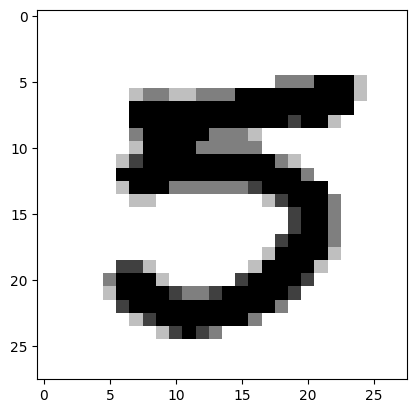

In [ ]:
# Lets view some data
plt.imshow(X_train[5465], cmap="binary")
plt.show()

<Axes: >

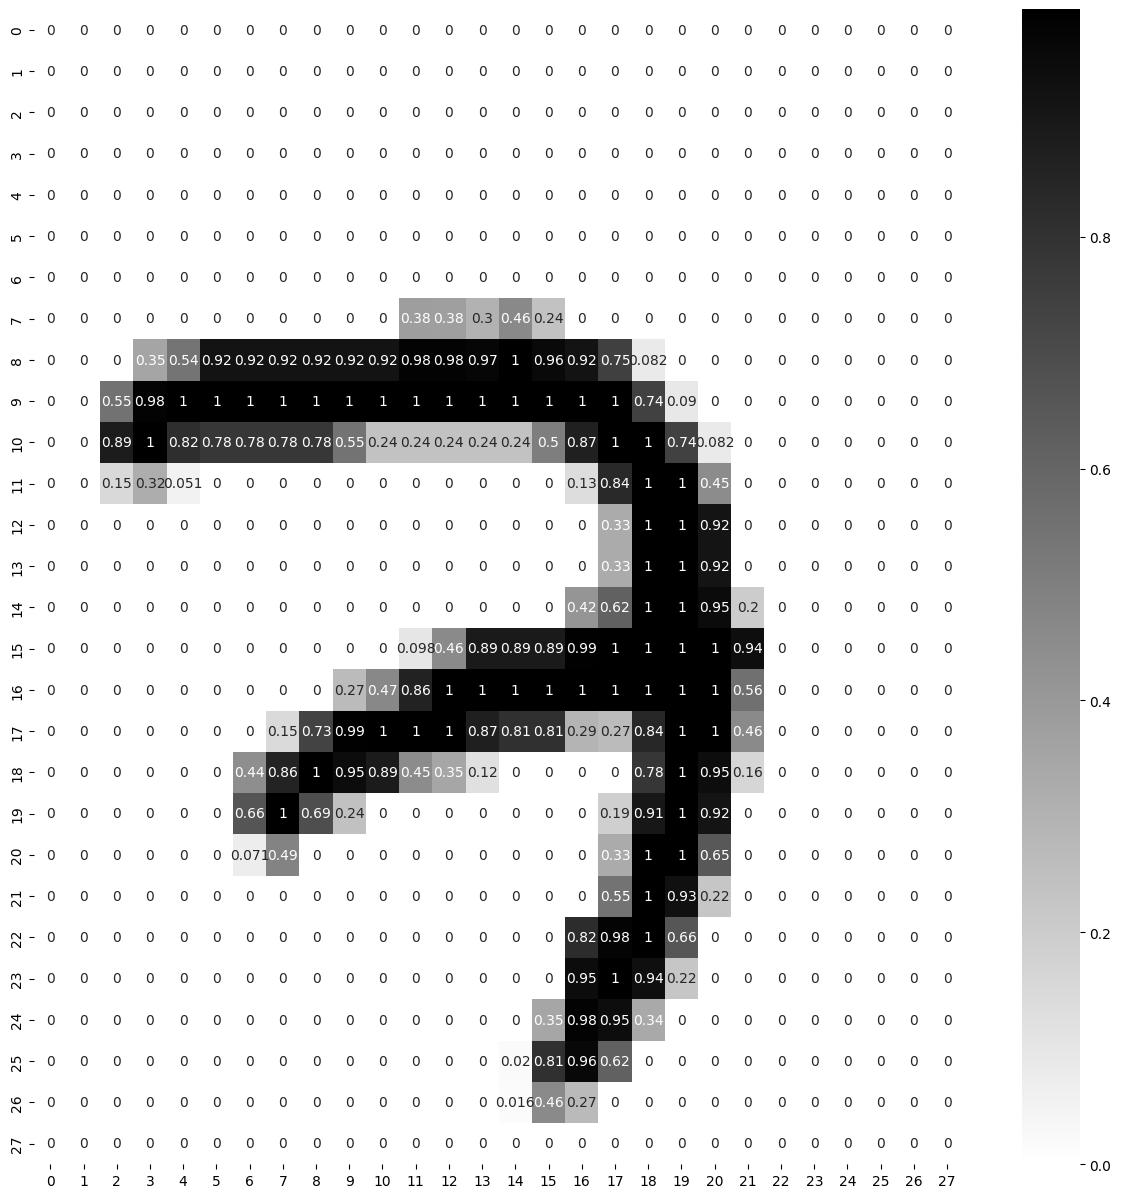

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [ ]:
# Architecture Used:
from IPython.display import Image

# Display the image from the URL
Image(url="https://1drv.ms/i/c/232348fc8f8daac7/EbbazZMYShlCnCnAh_zjcFAB1HcvtuW3GeeMgLcnjSotSw?e=dB6kOm")


In [ ]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [ ]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
  len(hidden1.get_weights()[1]),len(hidden1.get_weights()[0])

(300, 784)

In [ ]:
hidden1.get_weights()

[array([[-0.06204925, -0.02537671,  0.00064027, ...,  0.0190672 ,
          0.00438047, -0.06014383],
        [-0.0144183 ,  0.03286865, -0.00616685, ...,  0.01652029,
         -0.03220671,  0.01204617],
        [ 0.02324694,  0.02258752,  0.04032981, ...,  0.05818868,
          0.06049506,  0.06941123],
        ...,
        [-0.02845682,  0.04181057, -0.03467694, ...,  0.01114223,
         -0.00330626,  0.01705562],
        [-0.05102214, -0.05231784,  0.04769641, ..., -0.0701194 ,
         -0.02675737,  0.02486154],
        [ 0.05971709, -0.06985465, -0.02774032, ..., -0.03446447,
          0.02590717,  0.04135751]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.06204925, -0.02537671,  0.00064027, ...,  0.0190672 ,
         0.00438047, -0.06014383],
       [-0.0144183 ,  0.03286865, -0.00616685, ...,  0.01652029,
        -0.03220671,  0.01204617],
       [ 0.02324694,  0.02258752,  0.04032981, ...,  0.05818868,
         0.06049506,  0.06941123],
       ...,
       [-0.02845682,  0.04181057, -0.03467694, ...,  0.01114223,
        -0.00330626,  0.01705562],
       [-0.05102214, -0.05231784,  0.04769641, ..., -0.0701194 ,
        -0.02675737,  0.02486154],
       [ 0.05971709, -0.06985465, -0.02774032, ..., -0.03446447,
         0.02590717,  0.04135751]], dtype=float32)

In [ ]:
print("shape\n", biases.shape)

shape
 (300,)


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [ ]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7331 - loss: 0.9897 - val_accuracy: 0.9150 - val_loss: 0.3059
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9118 - loss: 0.3102 - val_accuracy: 0.9300 - val_loss: 0.2437
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9292 - loss: 0.2496 - val_accuracy: 0.9412 - val_loss: 0.2081
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9389 - loss: 0.2151 - val_accuracy: 0.9486 - val_loss: 0.1805
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9480 - loss: 0.1822 - val_accuracy: 0.9554 - val_loss: 0.1648
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9547 - loss: 0.1576 - val_accuracy: 0.9604 - val_loss: 0.1532
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9578 - loss: 0.1458 - val_accuracy: 0.9642 - val_loss: 0.1377
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9627 - loss: 0.1294 - 

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.843182,0.595475,0.9150,0.305858
1,0.917673,0.290915,0.9300,0.243670
2,0.931691,0.239534,0.9412,0.208096
3,0.940873,0.205678,0.9486,0.180542
4,0.949055,0.179862,0.9554,0.164824
5,0.955036,0.159114,0.9604,0.153244
6,0.958491,0.142500,0.9642,0.137693
7,0.962964,0.128754,0.9670,0.126528
8,0.966491,0.116859,0.9684,0.117276
9,0.969582,0.106753,0.9692,0.112171


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['val_accuracy'].plot(kind='hist', bins=20, title='val_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='accuracy', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='loss', y='val_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='val_accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['val_accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('val_accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['val_accuracy'].plot(kind='line', figsize=(8, 4), title='val_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

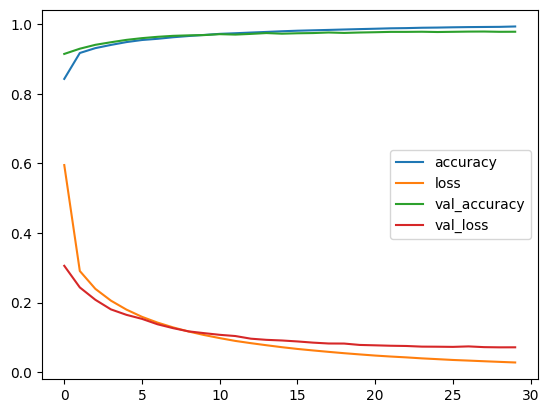

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0841


[0.06872125715017319, 0.9782000184059143]

In [ ]:
x_new = X_test[:3]
 #x_new

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
y_prob = model_clf.predict(x_new)
#y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


In [ ]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
        0.   ]], dtype=float32)

In [ ]:
y_prob

array([[1.0724732e-06, 2.4244068e-08, 1.9187704e-05, 3.4302985e-04,
        8.2464577e-09, 3.1621798e-06, 1.3325871e-11, 9.9961042e-01,
        1.6715476e-05, 6.4160890e-06],
       [1.8128807e-06, 3.6380196e-05, 9.9975115e-01, 1.9074623e-04,
        1.5521746e-10, 8.2843990e-06, 2.1231097e-06, 9.2102992e-12,
        9.4852012e-06, 3.2940060e-13],
       [2.6313664e-06, 9.9808961e-01, 1.9125277e-04, 2.8326598e-05,
        1.8132351e-04, 1.6525823e-04, 2.1255873e-04, 3.6591748e-04,
        7.6010235e-04, 3.2391956e-06]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis = 1)

In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

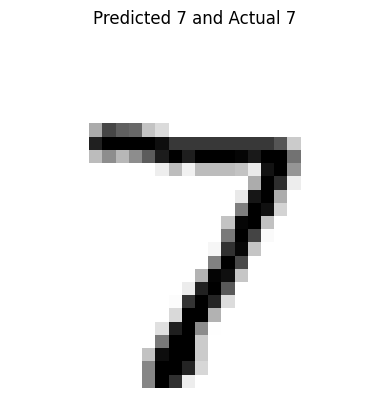

######################


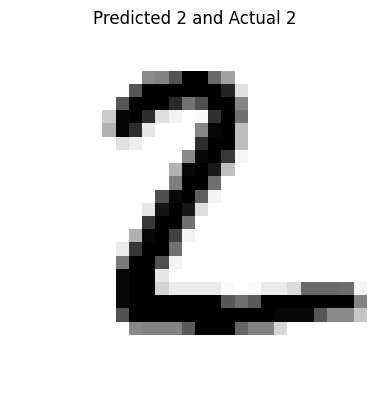

######################


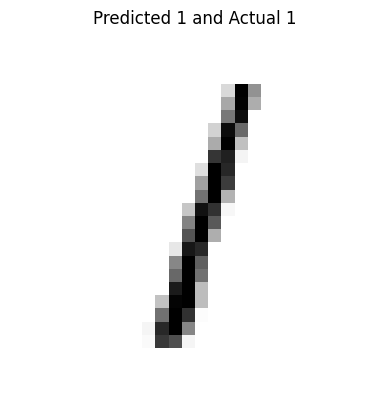

######################


In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")